In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import matplotlib.patches as patches
from IPython.display import HTML


%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Trajectory Functions

In [2]:
def point_to_point_traj(x1,v1,ac1,x2,v2,ac2,T):
    for i in range(len(T)-1):
        t_o = T[i]
        t_f = T[i+1]
        Δt = 0.1
        t = np.linspace(t_o,t_f,int(t_f/Δt+1))
        print(len(t))
        M = np.array([[1,t_o,t_o**2,t_o**3,t_o**4,t_o**5],[0,1,2*t_o,3*t_o**2,4*t_o**2,5*t_o**4],[0,0,2,6*t_o,12*t_o**2,20*t_o**3],[1,t_f,t_f**2,t_f**3,t_f**4,t_f**5],[0,1,2*t_f,3*t_f**2,4*t_f**2,5*t_f**4],[0,0,2,6*t_f,12*t_f**2,20*t_f**3]])
        B = np.array([x1,v1,ac1,x2,v2,ac2])
        det_matrix = np.linalg.det(M)
        print("The Determinant is: ",det_matrix)
        co_matrix = np.dot(np.linalg.inv(M),B)
        position = co_matrix[0] + co_matrix[1]*t + co_matrix[2]*t**2 + co_matrix[3]*t**3 + co_matrix[4]*t**4 + co_matrix[5]*t**5
        velocity = co_matrix[1] + 2*co_matrix[2]*t + 3*co_matrix[3]*t**2 + 4*co_matrix[4]*t**3 + 5*co_matrix[5]*t**4
        accelaration = 2*co_matrix[2] + 6*co_matrix[3]*t + 12*co_matrix[4]*t**2 + 20*co_matrix[5]*t**3

    return position, velocity, accelaration

def piecewise2D(X, Z, Vx, Vz, Ax, Az, T):
    x, z, dx, dz, ddx, ddz, theta_x,= [],[],[],[],[],[],[]
    theta_dx, theta_ddx= [],[]
    for i in range(len(P)-1):
        xi, dxi, ddxi = point_to_point_traj(X[i],Vx[i],Ax[i],X[i+1],Vx[i+1],Ax[i+1],T)
        zi, dzi, ddzi = point_to_point_traj(Z[i],Vz[i],Az[i],Z[i+1],Vz[i+1],Az[i+1],T)
        theta_xi, theta_dxi, theta_ddxi = point_to_point_traj(Z[i],Vz[i],Az[i],Z[i+1],Vz[i+1],Az[i+1],T)

        x += xi.tolist()
        z += zi.tolist()
        dx += dxi.tolist() 
        dz += dzi.tolist()
        ddx += ddxi.tolist()
        ddz += ddzi.tolist()
        theta_x += theta_xi.tolist()
        theta_dx += theta_dxi.tolist()
        theta_ddx += theta_ddxi.tolist()
        plt.xlabel('X_Position')
        plt.ylabel('Y_Position')
        plt.title('Quintic Trajectory')
        plt.grid()
        plt.plot(x,z)
    return x,z,dx,dz,ddx,ddz,theta_x,theta_dx,theta_ddx


# Plotting Functions

In [3]:
def plot_points():
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    plt.grid()
    ax1.plot(X,Z, '--')
    ax1.plot(X,Z, 'o')
    ax1.quiver(X,Z, Vx, Vz, color='r')

In [4]:
def plot_speed():
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    speed = np.sqrt(np.array(dx)**2 + np.array(dz)**2)
    plt.title('Veloctiy of Robot')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.grid()
    plt.plot(speed)

# Euler Integration

In [5]:
def simulate(Δt,z,u):
    z = z + Δt*u
    return z

# Requirements for the trajectory

101
The Determinant is:  -96800000000.00005
101
The Determinant is:  -96800000000.00005
101
The Determinant is:  -96800000000.00005


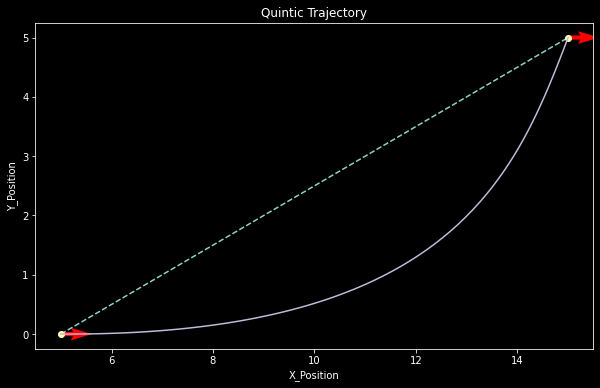

In [6]:
# Waypoints
p1 = [5, 0]
p2 = [15,5]

# Velocities
v1 = [0.5,0.]
v2 = [0.5,0]

# Time
t1 = 0
t2 = t1 + 10

#Accelaration
A1 = [0.5, 0]
A2 = [0,0]

# Grouping
P = np.vstack((p1, p2))
V = np.vstack((v1, v2))
A = np.vstack((A1, A2))
T = [t1, t2]

X, Z = P[:,0], P[:,1]
Vx, Vz = V[:,0], V[:,1]
Ax, Az = A[:,0], A[:,1]

plot_points()


# Piecewise function
x,z,dx,dz,ddx,ddz,theta_x,theta_dx,theta_ddx = piecewise2D(X, Z, Vx, Vz, Ax, Az, T)

# Plotting Points and Speed

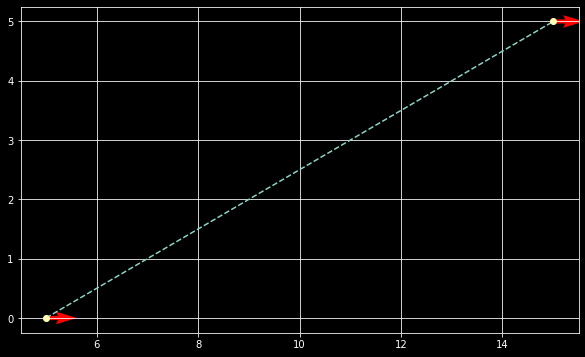

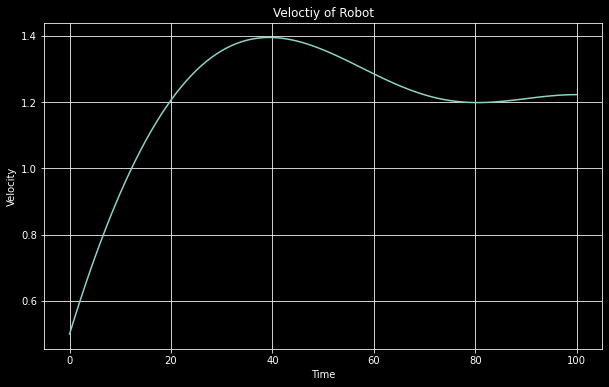

In [7]:
plot_points()
plot_speed()

In [8]:
x_1 = np.array(x)
z_1 = np.array(z)
dx_1 = np.array(dx) 
dz_1 = np.array(dz)
theta_x_1 = np.array(theta_x)
theta_dx_1 = np.array(theta_dx)
ddx_1 = np.array(ddx)
ddz_1 = np.array(ddz)
theta_ddx_1 = np.array(theta_ddx)

# Creating Vehicle 

In [9]:
p1 = np.array([-2,0.5])
p2 = np.array([0,1])
p3 = np.array([2,0.5])
theta1 = 135
theta2 = 90
theta3 = 45

A = np.array([[math.cos(theta1),math.cos(theta2),math.cos(theta3)],[math.sin(theta1),math.sin(theta2),math.sin(theta3)],[math.cos(theta1)*p1[1]-math.sin(theta1)*p1[0],math.cos(theta2)*p2[1]-math.sin(theta3)*p3[0],math.cos(theta3)*p3[1]-math.sin(theta3)*p3[0]]])
print(A)
rank = np.linalg.matrix_rank(A)
print("The rank of the matrix is: ",rank)

[[-0.99608784 -0.44807362  0.52532199]
 [ 0.08836869  0.89399666  0.85090352]
 [-0.32130655 -2.14988067 -1.43914605]]
The rank of the matrix is:  3


# Vehicle Dynamics

In [10]:
tf=10
Δt = 0.1  #Time Step
time = np.linspace(0.,tf,int(tf/Δt+1))

#Initialization
z = np.array([5.,0.,0.,0.5,0.,0.])
#print(z)
z_log = [np.copy(z)]
dz = np.array([0.,0.,0.,0.,0.,0.])
r=1
g=9.8
mass = 1
kp_kd = np.array([1,2])

for t in range(len(time)-1):
    xu = kp_kd[0]*(x_1[t+1]-z[0]) + kp_kd[1]*(dx_1[t+1]-z[3]) + ddx_1[t+1]
    zu = ((kp_kd[0]*(z_1[t+1]-z[1]) + kp_kd[1]*(dz_1[t+1]-z[4]) + mass*g)/mass-g) + ddz_1[t+1]
    thetaU = (kp_kd[0]*(theta_x_1[t+1]-z[2]) + kp_kd[1]*(theta_dx_1[t+1]-z[5]))*(1/2*mass*r**2)+theta_ddx_1[t+1]
    wrench = np.array([xu,zu,thetaU])

    rotation = [[math.cos(theta_x_1[t]),math.sin(theta_x_1[t]),0],[math.sin(-theta_x_1[t]), math.cos(theta_x_1[t]),0],[0,0,1]]
    world_frame = np.dot(rotation,A)
    inv = np.linalg.inv(world_frame)
    u = np.dot(inv,wrench)
    
    a = np.dot(world_frame,u)
    dz[:3] = z[3:]
    dz[3:] = a

    z = simulate(Δt,z,dz)
    z_log.append(np.copy(z))
z_log = np.array(z_log)

pos_x = z_log[:,0]
#print(pos_x)
pos_z = z_log[:,1]
#print(pos_z)
pos_theta = z_log[:,2]

## Animation

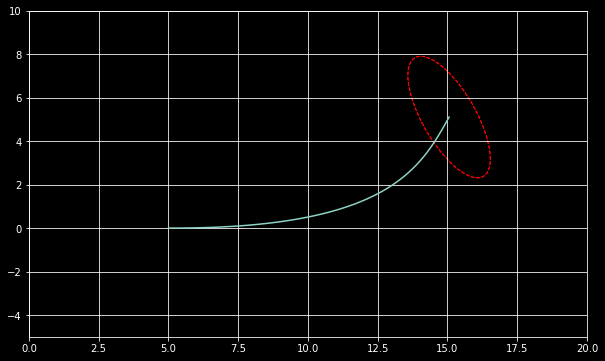

In [11]:
fig, ax = plt.subplots()

q_x = [-2, 0,2]
q_z = [0.5,1,0.5]
x_direct = [-1,0,1]
z_direct = [1,1,1]



ax.set_xlim(0, 20)
ax.set_ylim(-5, 10)
ax.plot(z_log[:,0],z_log[:,1])
plt.grid()
patch = patches.Ellipse((5,0),0,0,ec='r',fc='none',ls='--')


def init():
    ax.add_patch(patch)
    return patch,


def animate(i):

    patch.set_width(-6)
    patch.set_height(2)
    patch.set_center([pos_x[i], pos_z[i]])
    #patch.set_xy([0,0])
    
    patch.angle = np.rad2deg(pos_theta[i])
    return patch,

anim = animation.FuncAnimation(fig, animate,init_func=init,frames=len(time),interval=150,blit=True)

HTML(anim.to_jshtml())